<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 1</center></h2>
#### Brief
• Due date: 21 Feb, 2018 Thursday 11:59 PM<br>
• **First part:** Data visualization and pre-processing<br> 
• **Second Part:** Implement linear regression<br>
• **Third Part:** Read Paper and write summary<br> 
• **Required ﬁles:** Submit your ipython notebook (this file under the name of **RollNumber_A01.ipynb**) along with a **RollNumber_ReportA01.pdf (no docs or text file)** (strictly follow this notation).<br>
• Submission: Google Classroom<br>

#### Marks Distribution
Part 1: 10 Marks <br>
Part 2: 25 Marks <br>
Part 3: 15 Marks <br>

#### Overview
In the first part of this assignment, you have to pre-process the given data. In the second part implement the Linear Regression discussed in the class.<br>
For the first part of the assignment, we will use 'googleplaystore.csv' dataset which contain information of application on the google play store. For the second part we will use scaled down version of boston house price dataset.
All datasets have been provided along with this ipynb file on the classrom.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


## Part 1
### Data Pre-Processing and visualization

In [41]:
# There is a series of tutorials on pandas library https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm

# Load Dataset
data = pd.read_csv('googleplaystore.csv')


In [42]:
# Print the column names of the data variable

for a in data:
    print(a)
#or
data.columns

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [43]:
# Write a method to calculate the total profit (i.e. No. of installations x price) of all apps which are 4.3 or below
import re
import math
total_profit=0
temp = []
temp2 = []
temp3=[]
#Converting Installation and Price into int and float from string type
for a in data['Installs']:
    int_x = re.sub('[^A-Za-z0-9]+', '', a)
    temp.append(int(int_x))
for p in data['Price']:
    int_p = re.sub('[^A-Za-z0-9]+', '', p)
    temp2.append(float(int_p))
data['Profit'] = temp
data['Price'] = temp2


    

In [56]:
#Calculating Profit for app with Rating 4.3 or below
profit_rating = data.pivot_table(index='Rating' , values='Profit' ,aggfunc=np.sum)
#print(profit_rating)
p=[]
for i in profit_rating.index:
    if i <= 4.3:
        p.append(profit_rating['Profit'][i])
print("Total Profit(Upto 4.3 Rating):",sum(p))

Total Profit(Upto 4.3 Rating): 83411829755


In [73]:
# Some rating values are missing, fill those values by taking average of above and below app rating of that app. 
mean_rating=data['Rating'].mean()
print(mean_rating)
data['Rating']=data['Rating'].fillna(mean_rating)

4.191512757553228


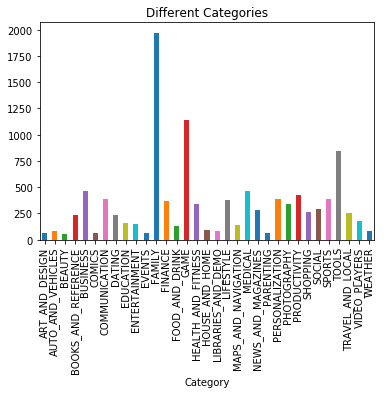

In [6]:
# Create a histogram graph of total count of each category in the dataset. 
plt.bar = data.groupby('Category').size().plot(kind='bar', title='Different Categories')
plt.show()

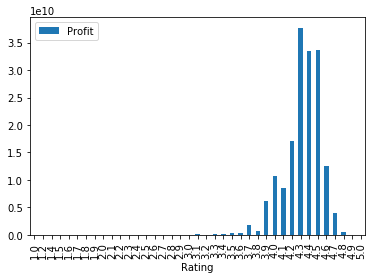

In [75]:
# Draw a graph of profit generated by each android version.
plt.bar = profit_rating.plot.bar()
plt.show()
#1e10 represeting the exponential value of profit

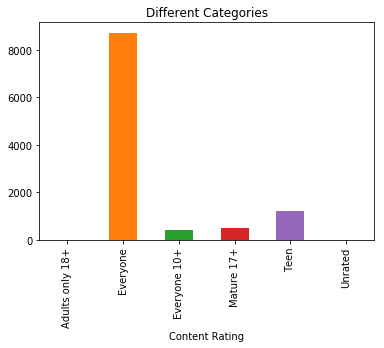

In [7]:
# Plot Number of installation which belongs to family category based on content rating.
plt.bar = data.groupby('Content Rating').size().plot(kind='bar', title='Different Categories')
plt.show()

# Part 2
### Linear Regression

The goal of this assignment is to develop your understanding of a basic Machine Learning model and learn some basic concepts such as how datasets are visualised and misc. We think that it is necessary to not only understand the mathematics behind the models but also to know how to convert that knowledge into code that can work.



Implementation detail of each step is given below.

In [78]:
# Load Dataset
#(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )

#You can load the second dataset in similar fashion
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )
# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train))
x_test.resize(len(x_test))


#### Part 2.a Linear Regression(without gradient descent) 

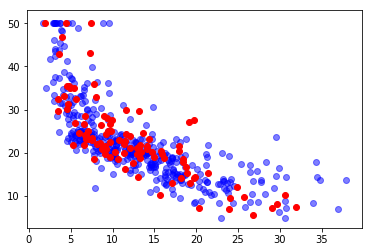

In [79]:
# Display training and testing dataset with different colors using matplotlib library.
plt.scatter(x_train ,y_train ,  c="b", alpha=0.5,label="Train" )
plt.scatter(x_test ,y_test, c='r')

In [80]:
# Compute line parameters from training data. 
# Compute 'm' and 'c' of line by formula given in: https://wikimedia.org/api/rest_v1/media/math/render/svg/8d2945202d09869511723ad4b0dfe5926cc3d2a0
# a-hat is c and b-hat is m in equation y = mx + c
#print(x_train)
cov=0
var_x=0
print(len(y_train))
#print(x_sum)
x_bar = sum(x_train)/len(x_train)
y_bar = sum(y_train)/len(y_train)
#print(x_bar)
for i in range(len(x_train)):
    cov = cov + (x_bar- x_train[i])*(y_bar - y_train[i])
    var_x = var_x + (x_bar -x_train[i])*(x_bar -x_train[i])
m = cov/var_x
c = y_bar - (m*x_bar)
print(m , c)   
    #var_y = var_y + (y - y_bar)

404
-0.9278216902292562 34.216255712624125


In [93]:
import math
# Implement mean square error function. i.e err = mean_square_error(Y_actual, Y_predicted)
# where err is the mean square error of actual label (i.e. Y_actual) and predicted lable ( i.e. Y_predicted)
def mse(y , y_hat):
    sum_err=0
    for i in range(len(y)):
        sum_err = sum_err + math.pow((y[i] - y_hat[i]),2)
    
    return sum_err/len(y) 

In [94]:
# Compute mean square error from line using training data i.e. training error.
y_hat = (m*x_train) + c
#print(y_train)
print(mse(y_train ,y_hat ))

39.42905636385888


In [95]:
# Compute mean square error from line using test data i.e. test error.
y_hat_test = (m*x_test) + c
#print(y_train)
print(mse(y_test ,y_hat_test ))

34.87619673683118


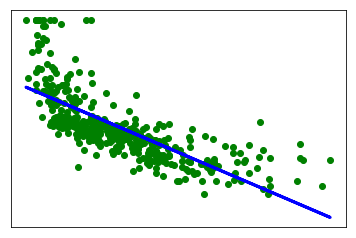

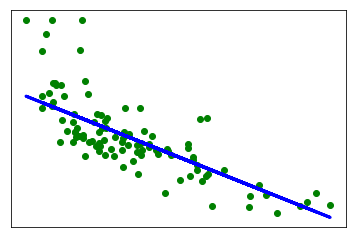

In [98]:
# Plot regression line on training and testing data separately.
plt.scatter(x_train, y_train,  color='g')
plt.plot(x_train,y_hat, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

plt.scatter(x_test, y_test,  color='g')
plt.plot(x_test,y_hat_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Part 2.b Linear Regression (with gradient descent)

In [0]:
# Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.

In [0]:
# Predict output and update parameters using stochastic gradient descent.
# Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library

In [0]:
# Compute mean square error of final trained parameters on testing data

In [0]:
# Plot a regression line on the training and the testing data separately.

# Part 3

#### Details

• Theoratical:
<p style="text-indent: 1em;">• Answer the following question: For a 10 dimensional dataset, What is the minimum number of points that are required to fit a hyperplane? (3 Points)</p>
<p style="text-indent: 1em;">• Read the following paper "Deep Learning" (http://pages.cs.wisc.edu/~dyer/cs540/handouts/deeplearning-nature2015.pdf). It is an exciting paper published in Nature and written by three pioneers of the deep learning — Yann LeCun, Yoshua Bengio and Geoffrey Hinton. The tripod of deep learning if you will :). The objective of this reading is to get you guys excited about deep learning and what can be / has been achieved with it. Write a summary of this paper, and let us know what it is that you find most exciting about deep learning and why? Your summary should not exceed 200 words. </p>
<p style="text-indent: 1em;">• Question 1: Write a summary of the paper (7 Points) </p>
<p style="text-indent: 1em;">• Question 2: What is the difference between deep and shallow learning. Explain with concrete example(s) when shallow learning is suitable as compared to deep learning and vise versa. (5 Points)
</p><br>


#### Note (Again): Submit your ipython notebook (this file under the name of RollNumber_A01.ipynb) along with a RollNumber_ReportA01.pdf (no docs or text file) (strictly follow this notation).